# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Mapleによる最小2乗法" data-toc-modified-id="Mapleによる最小2乗法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mapleによる最小2乗法</a></div><div class="lev2 toc-item"><a href="#python-code" data-toc-modified-id="python-code-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>python code</a></div><div class="lev1 toc-item"><a href="#最小2乗法の原理" data-toc-modified-id="最小2乗法の原理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>最小2乗法の原理</a></div><div class="lev1 toc-item"><a href="#chi^2の極小値から(2変数の例)" data-toc-modified-id="chi^2の極小値から(2変数の例)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$\chi^2$の極小値から(2変数の例)</a></div><div class="lev1 toc-item"><a href="#正規方程式(Normal-Equations)による解" data-toc-modified-id="正規方程式(Normal-Equations)による解-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>正規方程式(Normal Equations)による解</a></div><div class="lev2 toc-item"><a href="#Mapleによる具体例" data-toc-modified-id="Mapleによる具体例-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mapleによる具体例</a></div><div class="lev2 toc-item"><a href="#python-code" data-toc-modified-id="python-code-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>python code</a></div><div class="lev1 toc-item"><a href="#特異値分解(Singular-Value-Decomposition)による解" data-toc-modified-id="特異値分解(Singular-Value-Decomposition)による解-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>特異値分解(Singular Value Decomposition)による解</a></div><div class="lev2 toc-item"><a href="#python-code" data-toc-modified-id="python-code-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>python code</a></div><div class="lev1 toc-item"><a href="#2次元曲面へのフィット" data-toc-modified-id="2次元曲面へのフィット-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2次元曲面へのフィット</a></div><div class="lev2 toc-item"><a href="#Mapleによる具体例" data-toc-modified-id="Mapleによる具体例-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Mapleによる具体例</a></div><div class="lev2 toc-item"><a href="#python-code" data-toc-modified-id="python-code-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>python code</a></div><div class="lev2 toc-item"><a href="#正規方程式による解法" data-toc-modified-id="正規方程式による解法-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>正規方程式による解法</a></div><div class="lev1 toc-item"><a href="#課題" data-toc-modified-id="課題-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>課題</a></div>

<br />

<div style="text-align: center;">
<font size="7">線形最小2乗法(LeastSquareFit)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/leastsquarefit</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017 </font>
</div>


# Mapleによる最小2乗法



前章では，データに多項式を完全にフィットする補間についてみた．今回は，近似的にフィットする最小二乗法について詳しくみていく．図のようなデータに直線をフィットする場合を考えよう．


![C8_LeastSquareFitplot2d1.png](figs/C8_LeastSquareFitplot2d1.png)


コマンドleastsquareによるfitting(2変数の例)
```maple
> restart: X:=[1,2,3,4]: Y:=[0,5,15,24]:
> with(plots):with(linalg):with(stats):
> l1:=pointplot(transpose([X,Y]),symbolsize=30):
> eq_fit:=fit[leastsquare[[x, y], y = a0+a1*x, {a0,a1}]]([X, Y]);
```
$$
eq\_fit\, := \,y=-\frac{19}{2}+{\frac {41}{5}}\,x
$$
```maple
> f1:=unapply(rhs(eq_fit),x);
```
$$
f1\, := \,x\mapsto -\frac{19}{2}+{\frac {41}{5}}\,x
$$
```maple
> p1:=plot(f1(x),x=0..4):
> display(p1,l1);
```

![C8_LeastSquareFitplot2d2.png](figs/C8_LeastSquareFitplot2d2.png)





## python code

[ 8.2 -9.5]


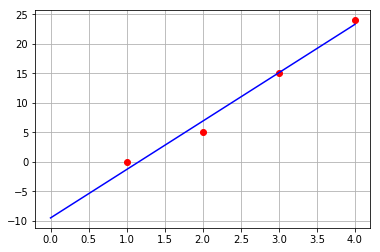

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a,b):
    return a*x+b

xdata = np.array([1,2,3,4])
ydata = np.array([0,5,15,24])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,4,20)
y = f(x,params[0],params[1])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

# 最小2乗法の原理



もっとも簡単な例で原理を解説する．近似関数として，

$$
F(x) = a_0+a_1\,x
$$
という直線近似を考える．もっともらしい関数は$N$点の測定データとの差$d_i = F(x_i)-y_i$を最小にすればよさそうであるが，これはプラスマイナスですぐに消えて不定になる．そこで，

$$
\chi^{2}=\sum_i^N d_i^2=\sum_i^N\left(a_0+a_1\,x_i-y_i\right)^2
$$
という関数を考える．この$\chi^2$(カイ二乗)関数が，$a_0, a_1$をパラメータとして変えた時に最小となる$a_0, a_1$を求める．これは，それらの微分がそれぞれ0となる場合である．これは$\chi^2$の和$\sum$(sum)の中身を展開し，

$\chi^2=$


$a_0, a_1$でそれぞれ微分すれば

$ \frac{\partial}{\partial a_0} \chi^2=$

$ \frac{\partial}{\partial a_1} \chi^2=$


という$a_0, a_1$を未知変数とする2元の連立方程式が得られる．これは前に説明した通り逆行列で解くことができる．




# $\chi^2$の極小値から(2変数の例)



```maple
> restart; X:=[1,2,3,4]: Y:=[0,5,15,24]: f1:=x->a0+a1*x:
  S:=0: 
  for i from 1 to 4 do 
    S:=S+(f1(X[i])-Y[i])^2; 
  end do:
> fS:=unapply(S,(a0,a1));
```
$$
{\it fS}\, := \,( {{\it a0},{\it a1}} )\mapsto  \left( {\it a0}+{\it a1} \right) ^{2}+ \left( {\it a0}+2\,{\it a1}-5 \right) ^{2}+ \left( {\it a0}+3\,{\it a1}-15 \right) ^{2}+ \left( {\it a0}+4\,{\it a1}-24 \right) ^{2}
$$
```maple
> expand(fS(a0,a1));
```
$$
4\,{{\it a0}}^{2}+20\,{\it a0}\,{\it a1}+30\,{{\it a1}}^{2}-88\,{\it a0}-302\,{\it a1}+826
$$

```maple
> plot3d(fS(a0,a1),a0=-20..20,a1=0..20);
```

![C8_LeastSquareFitplot3d3.png](figs/C8_LeastSquareFitplot3d3.png)



```maple
> eqs:={diff(expand(S),a0)=0, diff(expand(S),a1)=0};
```
$$
{\it eqs}\, := \, \left\{ 8\,{\it a0}+20\,{\it a1}-88=0,20\,{\it a0}+60\,{\it a1}-302=0 \right\}
$$

```maple
> solve(eqs,{a0,a1});
```
$$
\left\{ {\it a0}=-\frac{19}{2},{\it a1}={\frac {41}{5}} \right\}
$$




# 正規方程式(Normal Equations)による解



より一般的な場合の最小二乗法の解法を説明する．先程の例では1次の多項式を近似関数とした．これをより一般的な関数，例えば，$\sin, \cos, \tan, \exp, \sinh$などとする．これを線形につないだ関数を

$$
F \left(x \right)=a _{0}\sin \left(x \right)+a _{1}\cos \left(x \right)+a _{2}\exp \left(-x \right)+a _{3}\sinh \left(x \right)+\cdots ={\sum_{k=1}^{M}}a _{k }X _{k }\left(x \right)
$$
ととる．実際には，$X_k(x)$はモデルや，多項式の高次項など論拠のある関数列をとる．これらを基底関数(base functions)と呼ぶ．ここで線形といっているのは，パラメータ$a_k$について線形という意味である．このような，より一般的な基底関数を使っても，$\chi^2$関数は

$$
{\chi}^{2}=\sum _{i=1}^{N} \left( F \left( x_{{i}} \right) -y_{{i}} \right) ^{2}
=\sum _{i=1}^{N} \left( \sum _{k=1}^{M}a_{{k}}X_{{k}} \left( x_{{i}} \right) -y_{{i}} \right) ^{2}
$$
と求めることができる．この関数を，$a_k$を変数とする関数とみなす．この関数が最小値を取るのは，$\chi^2$を$M$個の$a_k$で偏微分した式がすべて0となる場合であ
る．これを実際に求めてみると，

$$
\sum _{i=1}^{N} \left( \sum _{j=1}^{M}a_{{j}}X_{{j}} \left( x_{{i}} \right) -y_{{i}} \right) X_{{k}} \left( x_{{i}} \right) =0
$$
となる．ここで，$k = 1..M$の$M$個の連立方程式である．この連立方程式を最小二乗法の正規方程式(normal equations)と呼ぶ．

上記の記法のままでは，ややこしいので，行列形式で書き直す．$N \times M$で，各要素を

$$
A_{ij} = X_j(x_i)
$$
とする行列$A$を導入する．この行列は，

$$
A=\left[
\begin{array}{cccc}
X_1(x_1) & X_2(x_1) & \cdots & X_M(x_1) \\
\vdots & \vdots & \cdots & \vdots \\
\vdots & \vdots & \cdots & \vdots \\
\vdots & \vdots & \cdots & \vdots \\
X_1(x_N) & X_2(x_N) & \cdots & X_M(x_N) 
\end{array}
\right]
$$
となる．これをデザイン行列と呼ぶ．すると先程の正規方程式は，

$$
A^t . A . a = A^t . y
$$
で与えられる．$A^t$は行列$A$の転置(transpose)

$$
A^t = A_{ij}^t = A_{ji}
$$
を意味し，得られた行列は，$M \times N$である．$a, y$はそれぞれ，

$$
a=\left[
\begin{array}{c}
a_1\\a_2\\\vdots\\a_M
\end{array}
\right],\,
y=\left[
\begin{array}{c}
y_1\\y_2\\\vdots\\y_N
\end{array}
\right]
$$
である．

$M = 3, N = 25$として行列の次元だけで表現すると，

$$
\left[
\begin{array}{ccccc}
&  & \cdots & &\\
\cdots & \cdots &  \cdots & \cdots & \cdots \\
&  & \cdots & &\\
\end{array}
\right]
\left[
\begin{array}{ccc}
& \vdots &\\
& \vdots &\\
\cdots & \cdots &  \cdots\\
& \vdots &\\
& \vdots &\\
\end{array}
\right]
\left[
\begin{array}{c}
\vdots\\
\vdots\\
\vdots
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
&  & \cdots & &\\
\cdots & \cdots &  \cdots & \cdots & \cdots \\
&  & \cdots & &\\
\end{array}
\right]
\left[
\begin{array}{c}
\vdots\\
\vdots\\
\vdots\\
\vdots\\
\vdots
\end{array}
\right]
$$
となる．これは少しの計算で$3 \times 3$の逆行列を解く問題に変形できる．




## Mapleによる具体例 


```maple
> restart; X:=[1,2,3,4]: Y:=[0,5,15,24]: 
  f1:=x->a[1]+a[2]*x+a[3]*x^2:
  with(LinearAlgebra): Av:=Matrix(1..4,1..3):
  ff:=(x,i)->x^(i-1):
  for i from 1 to 3 do 
    for j from 1 to 4 do
      Av[j,i]:=ff(X[j],i); 
    end do; 
  end do;
  Av;
```
$$
\left[ \begin{array}{ccc} 1&1&1\\1&2&4\\1&3&9\\1&4&16\end {array} \right]
$$
```maple
> Ai:=MatrixInverse(Transpose(Av).Av);
```
$$
{\it Ai}\, := \, \left[ \begin {array}{ccc} 
{ \frac {31}{4}}&-{ \frac {27}{4}}& \frac{5}{4}\\
-{ \frac {27}{4}}&{ \frac {129}{20}}& -\frac{5}{4}\\
\frac{5}{4}& -\frac{5}{4}& \frac{1}{4}
\end {array} \right]
$$
```maple
> b:=Transpose(Av).Vector(Y);
```
$$
b\, := \, \left[ \begin {array}{c} 44\\151\\539\end {array} \right]
$$

```maple
> Ai.b;
```
$$
\left[ \begin {array}{c} -\frac{9}{2}\\
{\frac {16}{5}}\\
1\end {array} \right]
$$




## python code


In [34]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])

def f(x,a1,a2,a3):
    return a1+a2*x+a3*x**2
def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)

pprint(Av)

Ai = linalg.inv(np.dot(np.transpose(Av),Av))
b = np.dot(np.transpose(Av),ydata)
np.dot(Ai,b)

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.]])


array([-4.5,  3.2,  1. ])

# 特異値分解(Singular Value Decomposition)による解



正規方程式を解くときには，少し注意が必要である．正規方程式での共分散行列,特異値分解の導出や標準偏差との関係はNumRecipeを参照せよ．
```maple
> restart; X:=[1,2,3,4]: Y:=[0,5,15,24]: f1:=x->a[1]+a[2]*x+a[3]*x^2:
> with(LinearAlgebra): Av:=Matrix(1..4,1..3):
> ff:=(x,i)->x^(i-1): 
  for i from 1 to 3 do 
    for j from 1 to 4 do
      Av[j,i]:=ff(X[j],i); 
    end do; 
  end do; 
  Av;
```
$$
\left[ \begin {array}{ccc} 1&1&1\\1&2&4\\1&3&9\\1&4&16\end {array} \right] 
$$

```maple
> U,S,Vt:=evalf(SingularValues(Av,output=['U','S','Vt'])):
> DiagonalMatrix(S[1..3],4,3); U.DiagonalMatrix(S[1..3],4,3).Vt:
```
$$
\left[ \begin {array}{ccc}  19.6213640200000015&0&0\\0& 1.71206987399999999&0\\0&0& 0.266252879300000022\\0&0&0\end {array} \right]
$$

```maple
> iS:=Vector(3): 
  for i from 1 to 3 do 
    iS[i]:=1/S[i]; 
  end do:
> DiS:=DiagonalMatrix(iS[1..3],3,4);
```
$$
{\it DiS}\, := \, \left[ \begin {array}{cccc}  0.05096485642&0&0&0\\0& 0.5840883104&0&0\\0&0& 3.755827928&0\end {array} \right]
$$

```maple
> Transpose(Vt).DiS.(Transpose(U).Vector(Y));
```
$$
\left[ \begin {array}{c} - 4.50000000198176498\\ 3.20000000035008324\\ 1.00000000040565196\end {array} \right]
$$





## python code

In [55]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])

def f(x,a1,a2,a3):
    return a1+a2*x+a3*x**2
def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)
m,n = Av.shape
pprint(Av)

U, s, Vs = linalg.svd(Av)
pprint(s)
S = linalg.diagsvd(s,m,n)
pprint(S)
iS = np.zeros([3,4])
for i in range(0,3):
    iS[i][i] = 1.0/s[i]
print(iS)
left = np.dot(np.transpose(Vs),iS)
right= np.dot(np.transpose(U),ydata)
np.dot(left,right)

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.]])
array([ 19.62136402,   1.71206987,   0.26625288])
array([[ 19.62136402,   0.        ,   0.        ],
       [  0.        ,   1.71206987,   0.        ],
       [  0.        ,   0.        ,   0.26625288],
       [  0.        ,   0.        ,   0.        ]])
[[ 0.05096486  0.          0.          0.        ]
 [ 0.          0.58408831  0.          0.        ]
 [ 0.          0.          3.75582793  0.        ]]


array([-4.5,  3.2,  1. ])

# 2次元曲面へのフィット



先程の一般化をより発展させると，3次元$(x_i, y_i, z_i)$で提供されるデータへの，2次元平面でのフィットも可能となる．2次元の単純な曲面は，方程式を使って，

$$
F(x, y) = a_1+a_2\,x+a_3\,y+a_4\,xy+a_5\,x^2+a_6\,y^2
$$
となる．デザイン行列の$i$行目の要素は，

$$
[1, x_i, y_i, x_i\,y_i, x_i^2, y_i^2]
$$
として，それぞれ求める．このデータの変換の様子をMapleスクリプトで詳しく示した．後は，通常の正規方程式を解くようにすれば，このデータを近似する曲面を定めるパラメータ$a_1, a_2, \cdots,a_6$が求まる．最小二乗法はパラメータ$a_k$について線形であればよい．




## Mapleによる具体例 


実際のデータ解析での例．データの座標をx,y,zで用意して，Mapleの埋め込み関数のleastsquareでfitしている．
```maple
> with(plots):with(plottools): 
  z:=[0.000046079702088, 0.000029479057275,
  0.000025769637830, 0.000034951410953, 0.000057024385455, 0.000029485453808,
  0.000011519913869, 0.000006442404299, 0.000014252898382, 0.000034951410953,
  0.000025769637773, 0.000006442404242, 0.000000000000057, 0.000006442404242,
  0.000025769637773, 0.000034932221524, 0.000014246501905, 0.000006442404299,
  0.000011519913926, 0.000029479057332, 0.000056973214100, 0.000034932221467,
  0.000025769637773, 0.000029485453808, 0.000046079702031]:
>  x:=[]:
  y:=[]:
  p1:=2:
  for i from -p1 to p1 do
    for j from -p1 to p1 do
      x:=[op(x),i*0.0005];
      y:=[op(y),j*0.0005];
    end do;
  end do;
> with(LinearAlgebra): p2:=convert(Transpose(Matrix([x,y,z])),listlist):
  pp2:=pointplot3d(p2,symbol=circle,symbolsize=30,color=black):
  with(stats): data:=[x,y,z]: 
  fit1:=fit[leastsquare[[t,s,u], 
    u=a1+a2*t+a3*s+a4*t*s+a5*t^2+a6*s^2, 
    {a1,a2,a3,a4,a5,a6}]](data);
```
$$
{\it fit1}\, := \,u=-{ 8.657142857\times 10^{-13}}- 0.000006396456800\,t+ 0.000006396438400\,s\notag \\ 
- 5.459553587\,ts+ 25.76962838\,{t}^{2}+ 25.76962835\,{s}^{2} \notag 
$$
```maple
> f1:=unapply(rhs(fit1),(s,t)):
> pf1:=plot3d(f1(ss,uu),ss=-0.001..0.001,uu=-0.001..0.001,color=gray):
> display(pf1,pp2,axes=boxed);
```

![C8_LeastSquareFitplot3d4.png](figs/C8_LeastSquareFitplot3d4.png)





In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a1, a2, a3,a4,a5,a6):
    s,t = x[0],x[1]
    return a1+a2*t+a3*s+a4*t*s+a5*t^2+a6*s^2

params, cov = curve_fit(f, np.array([x,y]), z)
print(params)



TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [10]:
?optimize

Object `optimize` not found.


## python code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
z = np.array([0.000046079702088, 0.000029479057275,
  0.000025769637830, 0.000034951410953, 0.000057024385455, 0.000029485453808,
  0.000011519913869, 0.000006442404299, 0.000014252898382, 0.000034951410953,
  0.000025769637773, 0.000006442404242, 0.000000000000057, 0.000006442404242,
  0.000025769637773, 0.000034932221524, 0.000014246501905, 0.000006442404299,
  0.000011519913926, 0.000029479057332, 0.000056973214100, 0.000034932221467,
  0.000025769637773, 0.000029485453808, 0.000046079702031])
x = []
y = []
for i in range(-2,3):
    for j in range(-2,3):
        x.append(i*0.0005)
        y.append(j*0.0005)



<IPython.core.display.Javascript object>


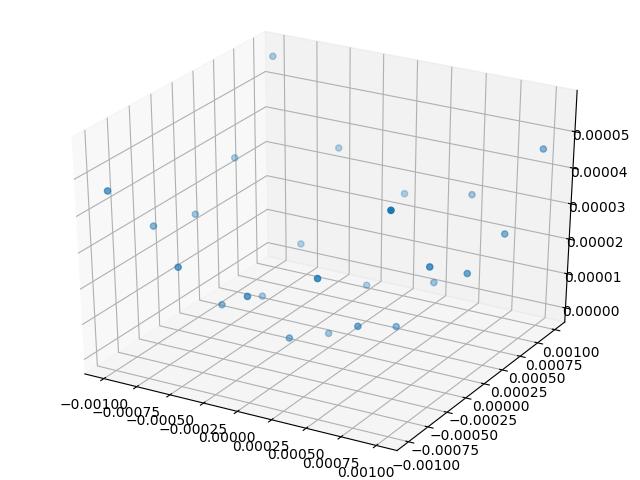

In [4]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.scatter3D(np.array(x),np.array(y),z) 

plt.show()

## 正規方程式による解法 


デザイン行列へのデータ変換
```maple
> bb:=Vector(25): A:=Matrix(25,6): 
  p1:=2: 
  for i from 1 to 25 do 
    A[i,1]:=1;
    A[i,2]:=x_i; 
    A[i,3]:=y_i; 
    A[i,4]:=x_i*y_i; 
    A[i,5]:=x_i^2; 
    A[i,6]:=y_i^2;
    bb_i:=z_i; 
  end do:
```
正規方程式の解
```maple
> MatrixInverse(Transpose(A).A).(Transpose(A).bb);
```
$$
\left[ \begin {array}{c} -{ 9.185257196\times 10^{-13}}\\   - 0.00000639644675999994798\\    0.00000639644220000032532\\   - 5.45955358336000173\\    25.7696284050857187\\    25.7696284050857543\end {array} \right]
$$




# 課題



1.  1次元の線形最小二乗法

次の4点のデータを$y = a_1+a_2 x+a_3 x^2$で近似せよ(2006年度期末試験)．
```maple
X:=[0,1,2,3];
Y:=[1,3,4,10];
```

1.  2次元の最小二乗フィット

以下のデータを

$$
f(x, y) = a_1+a_2 x+a_3 y+a_4 xy
$$
で近似せよ
```maple
 x,  y,  z
-1, -1,  2.00000
-1,  0,  0.50000
-1,  1, -1.00000
 0, -1,  0.50000
 0,  0,  1.00000
 0,  1,  1.50000
 1, -1, -1.00000
 1,  0,  1.50000
 1,  1,  4.00000
```
